# Figure 3 - Probability of short-term GMST reduction

This notebook includes the code to reproduce Figure 3a - the probabilities of short-term (one-year) GMST reduction greater than the temperature thresholds between 0.1ºC and 0.9ºC by 2100, and Figure 3b - the probability density functions of decadal trends for the three SSP scenarios.

---------------

Written by May Chim

Last updated: 9 August 2024

---------------

## Import packages and figure adjustments

In [1]:
import palettable
from matplotlib.patches import FancyArrowPatch
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import xarray as xr
import matplotlib.ticker as ticker
import matplotlib.patches as patches
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from scipy import stats

In [2]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['legend.edgecolor']='black'
plt.rcParams['axes.linewidth']='0.8'
plt.rcParams['xtick.bottom']= 'True'
plt.rcParams['ytick.left']= 'True'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['xtick.major.size']='3.5'
plt.rcParams['ytick.major.size']='3.5'
plt.rcParams['xtick.major.width']='0.8'
plt.rcParams['ytick.major.width']='0.8'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.bbox']='tight'

plt.rc('font', size=16)      
plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=16)   
plt.rc('xtick', labelsize=16)  
plt.rc('ytick', labelsize=16)   
plt.rc('legend', fontsize=14)   
plt.rc('figure', titlesize=20)

## Read data

In [3]:
# Directory of data files
#Set path
#os.chdir('<path-to-directory-of-data>')
os.chdir('/home/mmc70/nethome/codingprojects/stochastic_fair')

# Data for Figure 3a - Probability of short-term cooling
df_1year = pd.read_csv('table_prob_1year_cooling.csv')

# Data for Figure 3b - Decadal trends
decadal_df2 = xr.open_dataset('decadal_trend_moving_df2.nc')
decadal_dn = xr.open_dataset('decadal_trend_moving_dn.nc') 

## Figure 3a

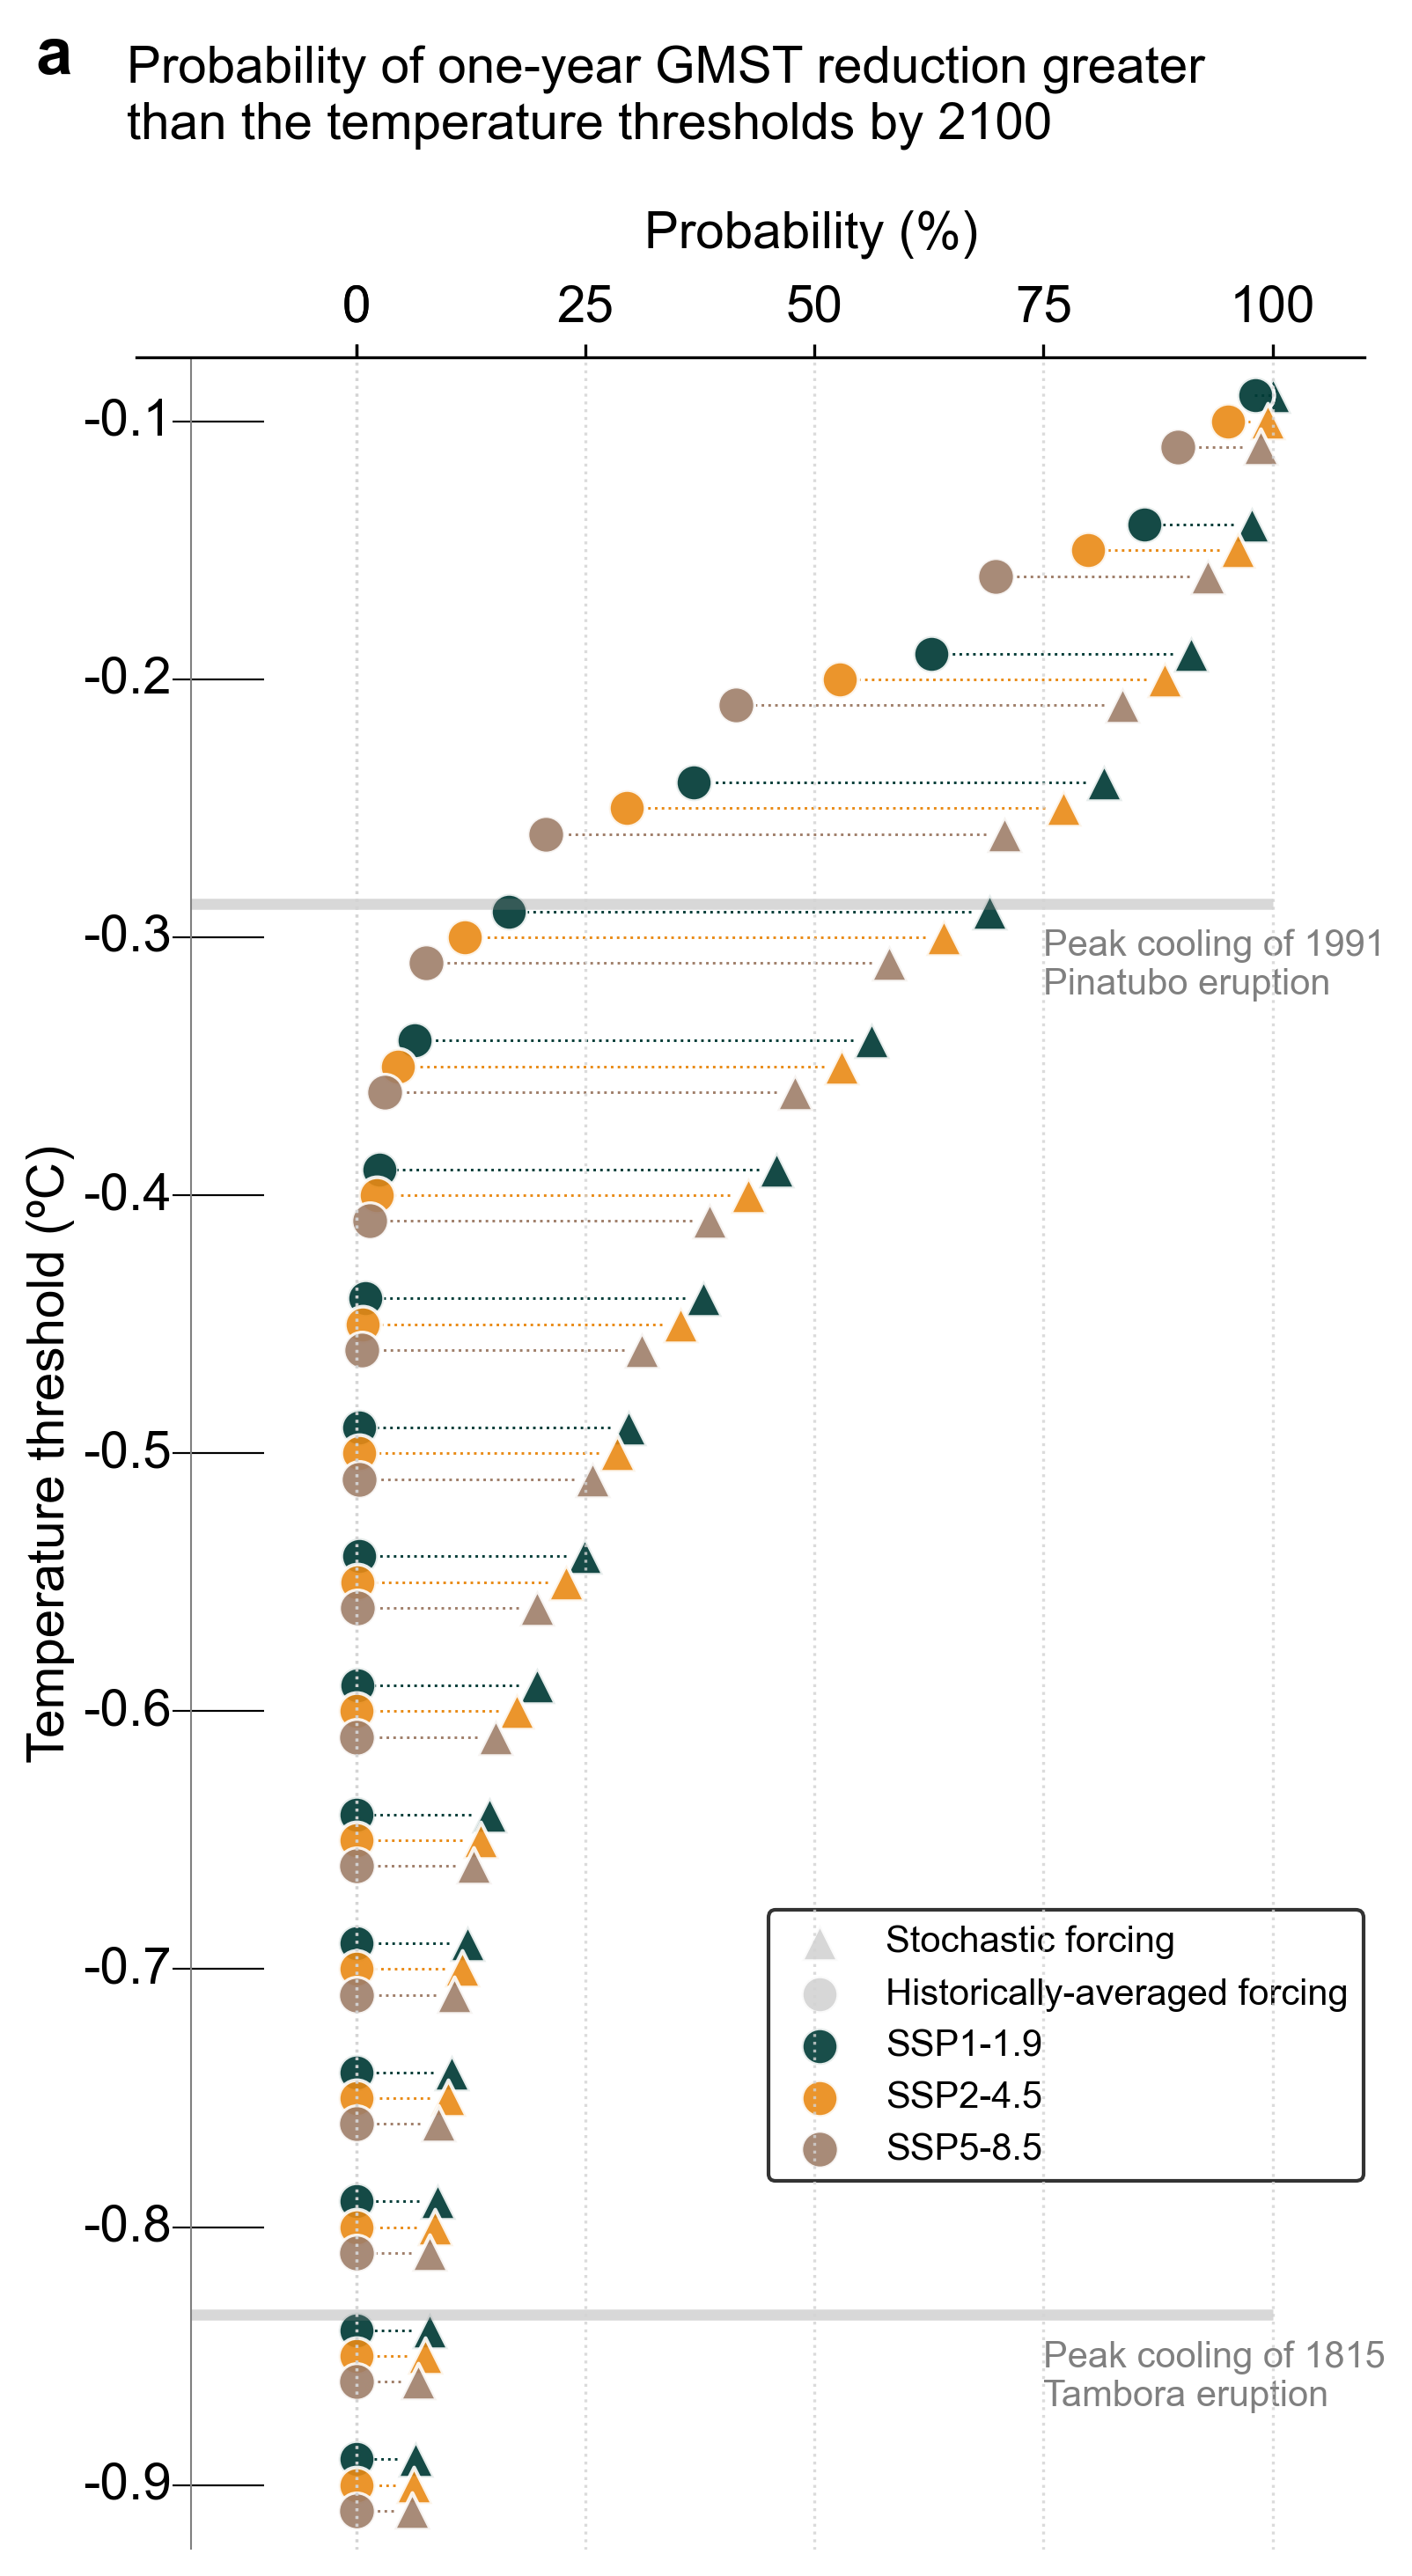

In [4]:
fig, ax1 = plt.subplots(figsize=(6, 11),dpi=300,frameon=False)
ax2 = ax1.twiny()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax2.spines['top'].set_visible(True)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

ax2.grid(axis='x', color = 'lightgrey', alpha = 0.8, ls = 'dotted')

color = ['#003B36', '#E98A15', '#9F7E69']

index = df_1year['Temperature']

cmap = mcolors.ListedColormap(palettable.scientific.sequential.LaJolla_10.mpl_colors)

# For legend grey markers
ax1.scatter(df_1year['SSP1-1.9'], index+0.035, color = 'lightgrey', 
            s = 100, label = 'Stochastic forcing', marker = '^', ec = 'white', alpha = 0.9)
ax1.scatter(df_1year['SSP1-1.9'], index+0.035, color = color[0], 
            s = 100, marker = '^', ec = 'white', alpha = 0.9)

#ssp119
ax1.hlines(index+0.035, df_1year['SSP1-1.9']-2, df_1year['HIST_ssp119']+2, 
           color = color[0], lw = 0.7, ls ='dotted')

ax1.scatter(df_1year['HIST_ssp119'], index+0.035, color = 'lightgrey',
            label = 'Historically-averaged forcing', s = 100, marker = 'o', ec = 'white', alpha = 0.9)
ax1.scatter(df_1year['HIST_ssp119'], index+0.035, color = color[0], 
            label = 'SSP1-1.9', s = 100, marker = 'o', ec = 'white', alpha = 0.9)

#ssp245
ax1.hlines(index+0.025, df_1year['SSP2-4.5']-2, df_1year['HIST_ssp245']+2, 
           color = color[1], lw = 0.7, ls ='dotted')
ax1.scatter(df_1year['SSP2-4.5'], index+0.025,
            color = color[1], marker = '^', ec = 'white', zorder = 11, s = 100, alpha = 0.9)
ax1.scatter(df_1year['HIST_ssp245'], index+0.025, label = 'SSP2-4.5',
            color = color[1], s = 100, ec = 'white', marker = 'o', zorder = 10, alpha = 0.9)

#ssp585
ax1.hlines(index+0.015, df_1year['SSP5-8.5']-2, df_1year['HIST_ssp585']+2, 
           color = color[2], lw = 0.7, ls ='dotted')
ax1.scatter(df_1year['SSP5-8.5'], index+0.015, 
            color = color[2], marker = '^', ec = 'white', zorder = 11, s = 100, alpha = 0.9)
ax1.scatter(df_1year['HIST_ssp585'], index+0.015, color = color[2], label = 'SSP5-8.5',
            s = 100, ec = 'white', marker = 'o', zorder = 10, lw = 0.8, alpha = 0.9)

ax1.text(-35,0.06,'a', fontsize=18, fontweight='bold')
ax1.text(-25,0.035,'Probability of one-year GMST reduction greater\nthan the temperature thresholds by 2100', fontsize=14)


# Peak cooling response of 1991 Pinatubo and 1815 Tambora
# -0.254 for first post eruption year - 1991 pinatubo
ax1.hlines(-0.287+0.025, -18, 100,color = 'grey', lw = 3, alpha = 0.3)
ax1.text(75, -0.287-0.01, 'Peak cooling of 1991\nPinatubo eruption', fontsize = 10, color = 'grey')

# -0.707 for first post eruption year - 1815 tambora
ax1.hlines(-0.834+0.025, -18, 100,color = 'grey', lw = 3, alpha = 0.3)
ax1.text(75, -0.834-0.01, 'Peak cooling of 1815\nTambora eruption', fontsize = 10, color = 'grey')


y = np.arange(-0.1, -0.91, -0.1)
x = np.linspace(0, 100, len(y))
for i, value in enumerate(y):
    if value <= -0.1:
        ax1.text(-25, value+0.025, f"{value:.1f}", ha="center", va="center", color="k", fontsize = 14)
        ax1.hlines(value+0.025, -20,-10, color = 'k', lw = 0.5)
        ax1.hlines(value+0.025, -20,-10, color = 'k', lw = 0.5)
        
ax1.vlines(-18, 0, -0.9, color='grey', lw=0.5)

ax1.set_ylim(-0.9,-0.05)
ax1.set_xlim(-24,110)
ax1.set_yticks([])


x_labels = [0,0,25,50,75,100]
ax1.set_xticklabels([])
ax1.set_xticks([])
ax2.set_xticklabels([])

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(x_labels)
ax2.set_xticklabels(x_labels, color='k', fontsize=14)
ax2.tick_params(axis='x', colors='k')
ax2.set_xlabel('Probability (%)', color='k', fontsize=14)
ax2.xaxis.set_label_coords(0.55, 1.05)


ax1.set_ylabel('Temperature threshold (ºC)', color = 'k', fontsize = 14)
ax1.yaxis.set_label_coords(-0.05,0.5)
ax1.legend(frameon=True, fontsize = 10, bbox_to_anchor=(0.5,0.3), labelcolor = 'k')

plt.savefig('Figure3a.pdf', format = 'pdf')

## Figure 3b

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


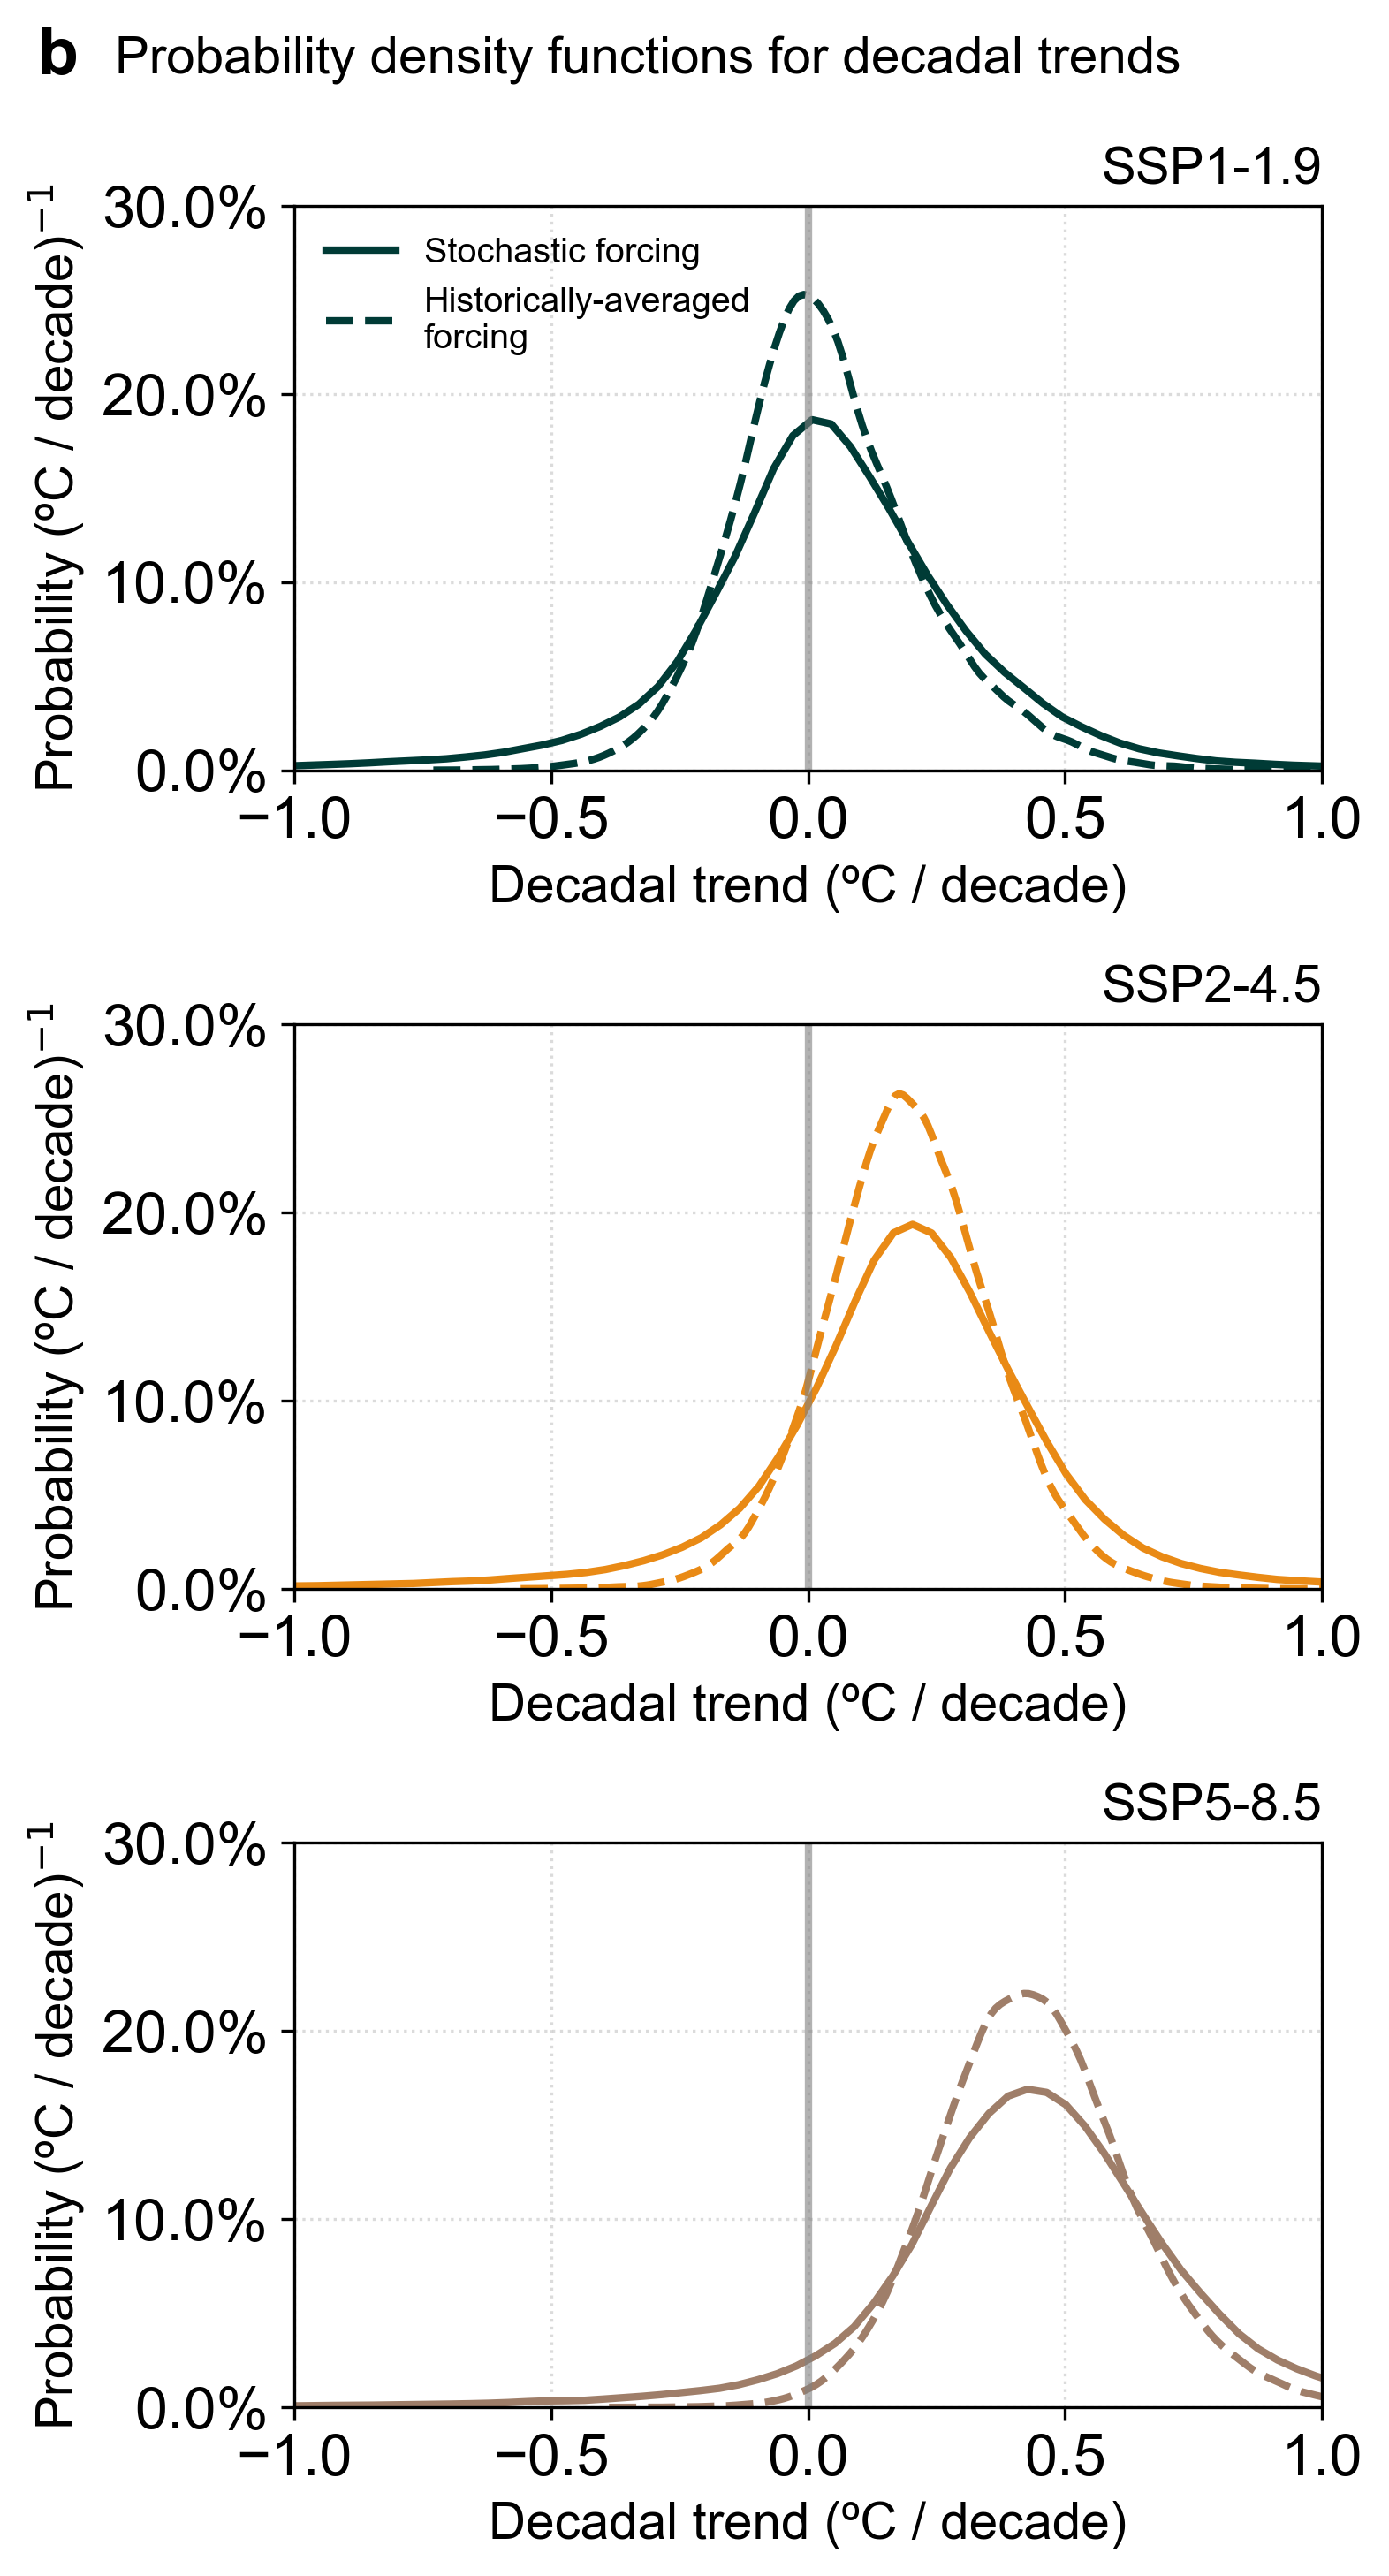

In [5]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(5, 11), dpi=300)
fig.subplots_adjust(hspace=0.45)

color = ['#003B36', '#E98A15', '#9F7E69']

# Flatten the arrays
decadal_trend_moving_df2_ssp119 = np.concatenate(decadal_df2.temperature[:,0,:])
decadal_trend_moving_df2_ssp245 = np.concatenate(decadal_df2.temperature[:,1,:])
decadal_trend_moving_df2_ssp585 = np.concatenate(decadal_df2.temperature[:,2,:])

decadal_trend_moving_dn_ssp119 = np.concatenate(decadal_dn.temperature[:,0])
decadal_trend_moving_dn_ssp245 = np.concatenate(decadal_dn.temperature[:,1])
decadal_trend_moving_dn_ssp585 = np.concatenate(decadal_dn.temperature[:,2])


sns.kdeplot(decadal_trend_moving_df2_ssp119*10, shade = False, common_norm = False, lw = 2, vertical = False, ax=ax1,
            color = color[0],label = 'Stochastic forcing')
sns.kdeplot(decadal_trend_moving_df2_ssp245*10, shade = False, common_norm = False, lw = 2, vertical = False,ax=ax2,
            color = color[1])
sns.kdeplot(decadal_trend_moving_df2_ssp585*10, shade = False, common_norm = False, lw = 2, vertical = False,ax=ax3,
            color = color[2])


sns.kdeplot(decadal_trend_moving_dn_ssp119*10, shade = False, common_norm = False, lw = 2, vertical = False,ax=ax1, ls = '--',
            color = color[0],label = 'Historically-averaged\nforcing')
sns.kdeplot(decadal_trend_moving_dn_ssp245*10, shade = False, vertical = False, lw = 2, ax=ax2,ls = '--',
            color = color[1])
sns.kdeplot(decadal_trend_moving_dn_ssp585*10, shade = False, vertical = False, lw = 2, ax=ax3,ls = '--',
            color = color[2])

ax1.text(-1.5,3.7,'b', fontsize=18, fontweight='bold')
ax1.text(-1.35,3.7,'Probability density functions for decadal trends', fontsize=14)


for ax in (ax1,ax2,ax3):
    binwidth = 0.1
    ax.yaxis.set_major_formatter(PercentFormatter(1 / binwidth))  
    ax.set_ylabel('Probability (ºC / decade)$^{-1}$', fontsize = 14)
    ax.set_xlim(-1,1)
    ax.set_ylim(0,3)
    ax.set_xlabel('Decadal trend (ºC / decade)', fontsize = 14)
    ax.legend(fontsize = 9.5, frameon=False, loc = 'upper left')
    ax.grid(axis='both', color = 'lightgrey', alpha = 0.8, ls = 'dotted')
    ax.vlines(x=0, ymin=0, ymax=3, color = 'grey', lw = 2, alpha = 0.6)

ax1.set_title('SSP1-1.9', loc = 'right', fontsize = 14)
ax2.set_title('SSP2-4.5', loc = 'right', fontsize = 14)
ax3.set_title('SSP5-8.5', loc = 'right', fontsize = 14)


plt.savefig('Figure3b.pdf', format = 'pdf')